# Investigation of performance of net mechanism on a two dimensional toy data set

In [1]:
import second_moment_experiments_main as experiment
import pickle
import matplotlib
import matplotlib.pyplot as plt
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
from exputils import extract_data, initialise_netmech_containers, initialise_adassp_reg_containers, initialise_netmech_reg_containers 
from baselines import Regression, DPRegression
import numpy as np
# %matplotlib tk

In [ ]:
# Load data 
exp_name = 'exp_lattice_denisty_combinations'
with open ('D:/Thesis/Experiments/exp_lattice_density_combinations/' + exp_name, "rb") as container:
    results = pickle.load(container)

## Experiment with combinations of targets and features lattice density combinations

$\textbf{Setup}$: Experiment with the combinations $(k_f,k_t) \in \{ (3,3),(3,4),(3,5), (4,3), (5,3)\}$ and look at the RMSE of the results.

### Parameter setup

In [2]:
# Default parameters list
dimensionality = 2
num_records = 40
test_frac = 0.5
batch_size = 1000
directory = 'D:/Thesis/Experiments/exp_lattice_density_combinations/'
parallel = False
save_data = True
partition_method = 'fast_2'
workers = -1
num_samples = 25
sample_parallel = False 
load_data = True
seed = 23

In [3]:
num_points_features_vec = [3, 3, 3, 4, 5]
num_points_targets_vec = [3, 4, 5, 3, 3]
epsilon_vec = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

### Run the experiments

In [4]:
# Collect results
results = {key: [] for key in epsilon_vec}
for epsilon in epsilon_vec:
    for num_points_features, num_points_targets in zip(num_points_features_vec, num_points_targets_vec):
        results[epsilon].append(experiment.second_order_moment_experiment(dimensionality = dimensionality, num_records = num_records, test_frac = test_frac, batch_size = batch_size,directory = directory, parallel = parallel, save_data = save_data,\
                                                                 partition_method = partition_method, workers = workers, num_samples = num_samples,\
                                                                 sample_parallel = sample_parallel, load_data = load_data, num_points_targets = num_points_targets,\
                                                                 num_points_features = num_points_features, epsilon = epsilon, seed = seed))

Initialising synthetic feature space lattice
Synthetic feature space initialised
Initialising synthethic target space lattice
Synthethic target space initialised
Number of batches is 1
Generating batch 0
Partition function is 45.049841964731165
Max scaled utility is -0.19991299864376783
Generation time 0.021939992904663086
Sampling time 0.0019958019256591797
Overall max utility -0.39982599728753565
Elapsed time without parallelisation is 0.036902427673339844
Initialising synthetic feature space lattice
Synthetic feature space initialised
Initialising synthethic target space lattice
Synthethic target space initialised
Number of batches is 1
Generating batch 0
Partition function is 90.90588383753045
Max scaled utility is -0.19991299864376783
Generation time 0.017786264419555664
Sampling time 0.0
Overall max utility -0.39982599728753565
Elapsed time without parallelisation is 0.033408164978027344
Initialising synthetic feature space lattice
Synthetic feature space initialised
Initialising

Max scaled utility is -0.40396396630001563
Generation time 0.00399017333984375
Sampling time 0.0009975433349609375
Overall max utility -0.08976977028889237
Elapsed time without parallelisation is 0.017952680587768555
Initialising synthetic feature space lattice
Synthetic feature space initialised
Initialising synthethic target space lattice
Synthethic target space initialised
Number of batches is 1
Generating batch 0
Partition function is 4.440217469882819
Max scaled utility is -1.9991299864376781
Generation time 0.013961553573608398
Sampling time 0.0009980201721191406
Overall max utility -0.39982599728753565
Elapsed time without parallelisation is 0.024933815002441406
Initialising synthetic feature space lattice
Synthetic feature space initialised
Initialising synthethic target space lattice
Synthethic target space initialised
Number of batches is 1
Generating batch 0
Partition function is 9.705122188142333
Max scaled utility is -1.9991299864376781
Generation time 0.002992153167724609

Generation time 0.020943641662597656
Sampling time 0.0009968280792236328
Overall max utility -0.39982599728753565
Elapsed time without parallelisation is 0.03191685676574707
Initialising synthetic feature space lattice
Synthetic feature space initialised
Initialising synthethic target space lattice
Synthethic target space initialised
Number of batches is 1
Generating batch 0
Partition function is 0.016738882980944524
Max scaled utility is -6.321611730729239
Generation time 0.01595759391784668
Sampling time 0.0009975433349609375
Overall max utility -0.15804029326823096
Elapsed time without parallelisation is 0.03091883659362793
Initialising synthetic feature space lattice
Synthetic feature space initialised
Initialising synthethic target space lattice
Synthethic target space initialised
Number of batches is 1
Generating batch 0
Partition function is 0.27767018388443676
Max scaled utility is -3.590790811555695
Generation time 0.010970115661621094
Sampling time 0.0009975433349609375
Overa

In [6]:
# Save the results for latter access
exp_name = 'exp_2_lattice_denisty_combinations'
with open (directory + exp_name, "wb") as container:
    pickle.dump(results, container)

## Analyse the data

In [26]:
# Extract private data
private_data = {key: [] for key in epsilon_vec}
synthetic_datasets_vec = {key: [] for key in epsilon_vec}

for key in results.keys():
    synthetic_datasets = []
    private_data[key] = results[key][0]['private_data']
    for result in results[key]:
        synthetic_datasets.append(result['synthetic_data'])
    synthetic_datasets_vec[key] = synthetic_datasets

In [27]:
# Initialise containers for the regression on the synthetic data sets released with netmechanism
net_mech_reg_coefs, predictive_errs_netmech, min_predictive_errs_netmech, mean_predictive_errs_netmech,\
double_std_predictive_errs_netmech, singular_indices = initialise_netmech_reg_containers(epsilon_vec)

# Initialise containers for the regression on the synthetic data sets with parameters released by ADASSP
adassp_reg_coef, predictive_err_adassp, min_predictive_err_adassp, mean_predictive_err_adassp, double_std_predictive_err_adassp = initialise_adassp_reg_containers(epsilon_vec)

In [28]:
# Fit ADASSP to the private dataset and calculate the predictive error
for epsilon in epsilon_vec:
    adassp_regressor = DPRegression()
    adassp_reg_coef[epsilon] = adassp_regressor.get_parameters(private_data[epsilon].features, private_data[epsilon].targets,\
                                                           num_samples, epsilon, seed = 15)
    predictive_err_adassp[epsilon] = Regression().calculate_predictive_error(private_data[epsilon].test_data, adassp_reg_coef[epsilon])
    min_predictive_err_adassp[epsilon] = np.min(predictive_err_adassp[epsilon])
    mean_predictive_err_adassp[epsilon] = np.mean(predictive_err_adassp[epsilon])
    double_std_predictive_err_adassp[epsilon] = 2*np.std(predictive_err_adassp[epsilon])
    # print ("Min predictive error adassp for eps " + str(epsilon) , min_predictive_err_adassp[epsilon])
    # print ("Mean predictive error adassp " + str(epsilon), mean_predictive_err_adassp[epsilon])
    # print ("Twice the std of predictive err adassp " + str(epsilon), double_std_predictive_err_adassp[epsilon])

In [29]:
# Perform regression on the datasets released with the net mechanism and calculate predictive error statistics
for epsilon in epsilon_vec:
    for synthetic_datasets in synthetic_datasets_vec[epsilon]:
        netmech_regressor = Regression()
        net_mech_reg_coef = netmech_regressor.fit_data(synthetic_datasets)
        net_mech_reg_coefs[epsilon].append(net_mech_reg_coef)
        predictive_err_netmech = netmech_regressor.calculate_predictive_error(private_data[epsilon].test_data, net_mech_reg_coef)
        singular_indices[epsilon].append(netmech_regressor.singular_indices)
        predictive_errs_netmech[epsilon].append(predictive_err_netmech)
        min_predictive_errs_netmech[epsilon].append(np.min(predictive_err_netmech))
        mean_predictive_errs_netmech[epsilon].append(np.mean(predictive_err_netmech))
        double_std_predictive_errs_netmech[epsilon].append(2*np.std(predictive_err_netmech))

Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic m

C:\Users\alexc\OneDrive\Documents\GitHub\Thesis\baselines.py:121: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  parameters[index] = np.linalg.lstsq(Sigma_tensor[index,:,:], correlations[index])[0]



Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic matrices
Warning, there were singular sythethic 

In [57]:
print(mean_predictive_errs_netmech[0.2])

[0.2813359556844592, 0.3377532405227848, 0.33503234692346257, 0.5638215414189973, 0.4617582153566815]


## Plot the results

In [53]:
xcoordinate = range(len(num_points_features_vec))
#yticks_low_vec = [-0.8, -0.8, -0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8, -0.65, -0.35, -0.2]
yticks_low = -1

#### Variation of average RMSE with $\varepsilon$ for combinations of  various lattice densities

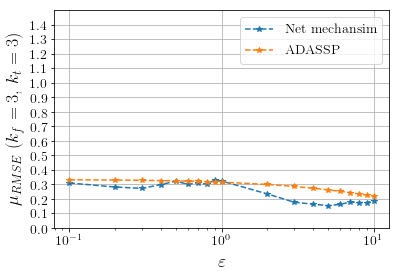

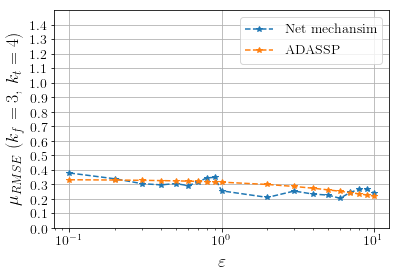

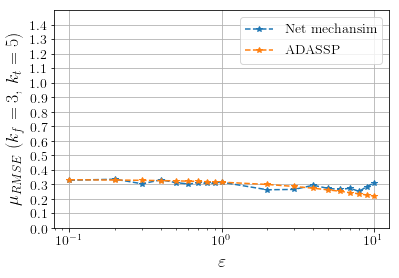

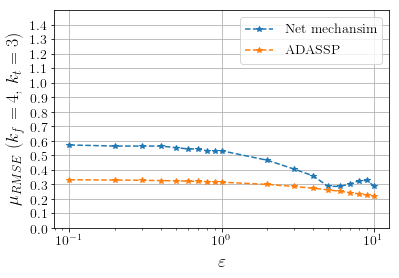

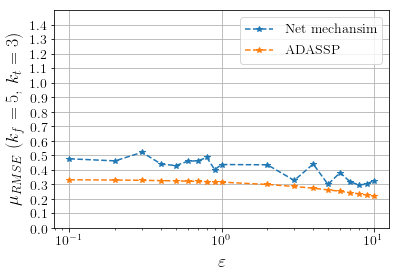

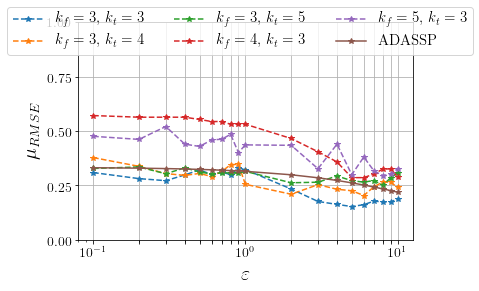

In [45]:
# Calculate variation of RMSE as a function of epsilon
rmse_eps_avg_netmech = {key: [] for key in range(len(num_points_features_vec))}
rmse_eps_std_netmech = {key: [] for key in range(len(num_points_targets_vec))}
rmse_eps_avg_adassp = []
rmse_eps_std_adassp = []

# Extract data
for epsilon in epsilon_vec[0: len(epsilon_vec)]:
    # print ("DEBUG:", mean_predictive_errs_netmech[epsilon])
    # print ("DEBUG:", len(mean_predictive_errs_netmech[epsilon]))
    for index in range(len(num_points_features_vec)):
        rmse_eps_avg_netmech[index].append(mean_predictive_errs_netmech[epsilon][index])
        rmse_eps_std_netmech[index].append(double_std_predictive_errs_netmech[epsilon][index])

rmse_eps_avg_adassp = [mean_predictive_err_adassp[epsilon] for epsilon in epsilon_vec[0: len(epsilon_vec)]] 
rmse_eps_std_adassp = [double_std_predictive_err_adassp[epsilon] for epsilon in epsilon_vec[0: len(epsilon_vec)]]

def plot_rmse_avg_epsilon(epsilon_vec, rmse_eps_avg_netmech, rmse_eps_avg_adassp, label, adassp = True):
    plt.semilogx(epsilon_vec, rmse_eps_avg_netmech, '--*', label = 'Net mechansim')
    if adassp:
        plt.plot(epsilon_vec, rmse_eps_avg_adassp, '--*', label = 'ADASSP')
        plt.ylim([0, 1.5]) 
    plt.xlabel(r'$\varepsilon$', fontsize = 18)
    plt.yticks(np.arange(0,1.5, step = 0.1))
    #  plt.xticks(epsilon_vec)
    plt.ylabel('$\mu_{RMSE}$' + label , fontsize = 18)
    plt.legend(fontsize = 14)
    plt.grid(True)
    plt.show()
        
for combination in xcoordinate:
    label = r' ($k_f =' + str(num_points_features_vec[combination]) + '$, $k_t =' + str(num_points_targets_vec[combination]) + '$)'
    # print ("DEBUG, rmse_eps_avg_netmech", rmse_eps_avg_netmech[lattice_density])
    plot_rmse_avg_epsilon(epsilon_vec[0: len(epsilon_vec)], rmse_eps_avg_netmech[combination], rmse_eps_avg_adassp, label, adassp = True)
    
# Plot average RMSE for ADASSP for selected values of the lattice density on the same graph
plt.figure(1)
#xcoordinate_range = xcoordinate
for combination in xcoordinate:
    label = r' $k_f =' + str(num_points_features_vec[combination]) + '$, $k_t =' + str(num_points_targets_vec[combination]) + '$'
    plt.semilogx(epsilon_vec[0: len(epsilon_vec)], rmse_eps_avg_netmech[combination], '--*', label = label)
plt.plot(epsilon_vec[0: len(epsilon_vec)], rmse_eps_avg_adassp,'-*', label = 'ADASSP')
plt.xlabel(r'$\varepsilon$', fontsize = 20)
plt.ylabel('$\mu_{RMSE}$', fontsize = 20)
plt.xticks(epsilon_vec[0: len(epsilon_vec)])
plt.yticks(np.arange(0,3, step = 0.25))
plt.ylim([0, 1]) 
plt.grid(True)
plt.legend(fontsize = 15, bbox_to_anchor=(0.5, 0.85), bbox_transform = plt.gcf().transFigure, loc = 'center', ncol = 3)
plt.show()

#### Variation of the RMSE standard deviation with $\varepsilon$ for different lattice densities

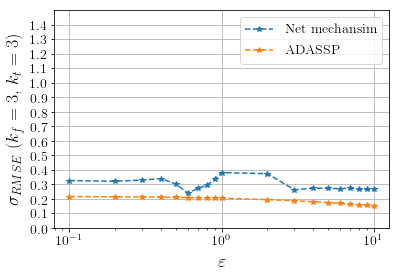

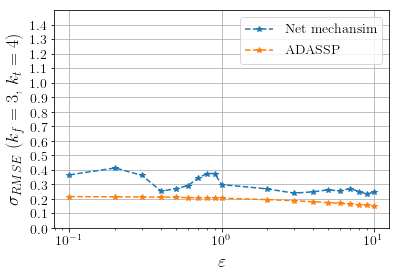

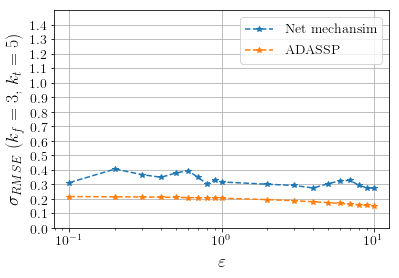

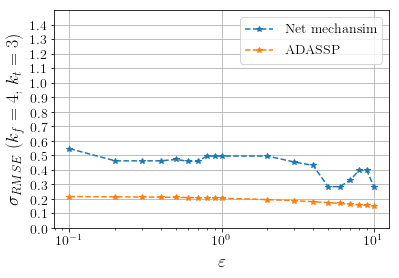

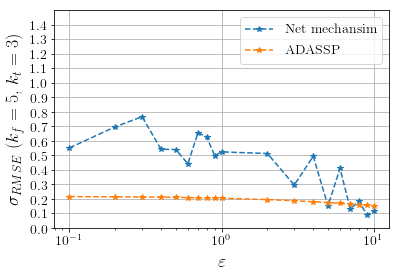

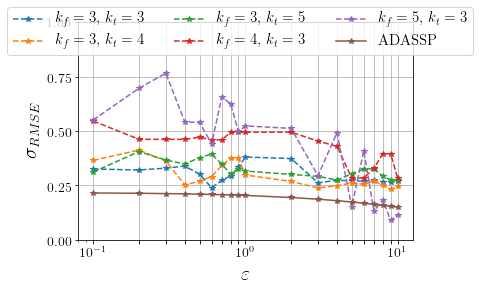

In [48]:
def plot_rmse_std_epsilon(epsilon_vec, rmse_eps_std_netmech, rmse_eps_std_adassp, label, adassp = True):
    plt.semilogx(epsilon_vec, rmse_eps_std_netmech, '--*', label = 'Net mechansim')
    if adassp:
        plt.plot(epsilon_vec, rmse_eps_std_adassp, '--*', label = 'ADASSP')
        plt.ylim([0, 1.5]) 
    plt.xlabel(r'$\varepsilon$', fontsize = 18)
    plt.yticks(np.arange(0,1.5, step = 0.1))
    #  plt.xticks(epsilon_vec)
    plt.ylabel(r'$\sigma_{RMSE}$' + label , fontsize = 18)
    plt.legend(fontsize = 14)
    plt.grid(True)
    plt.show()
        
for combination in xcoordinate:
    label = r' ($k_f =' + str(num_points_features_vec[combination]) + '$, $k_t =' + str(num_points_targets_vec[combination]) + '$)'
    # print ("DEBUG, rmse_eps_avg_netmech", rmse_eps_avg_netmech[lattice_density])
    plot_rmse_std_epsilon(epsilon_vec[0: len(epsilon_vec)], rmse_eps_std_netmech[combination], rmse_eps_std_adassp, label, adassp = True)
    
# Plot stdev RMSE for ADASSP for selected values of the lattice density on the same graph
plt.figure(1)
#xcoordinate_range = xcoordinate
for combination in xcoordinate:
    label = r' $k_f =' + str(num_points_features_vec[combination]) + '$, $k_t =' + str(num_points_targets_vec[combination]) + '$'
    plt.semilogx(epsilon_vec[0: len(epsilon_vec)], rmse_eps_std_netmech[combination], '--*', label = label)
plt.plot(epsilon_vec[0: len(epsilon_vec)], rmse_eps_std_adassp,'-*', label = 'ADASSP')
plt.xlabel(r'$\varepsilon$', fontsize = 20)
plt.ylabel('$\sigma_{RMSE}$', fontsize = 20)
plt.xticks(epsilon_vec[0: len(epsilon_vec)])
plt.yticks(np.arange(0,3, step = 0.25))
plt.ylim([0, 1]) 
plt.grid(True)
plt.legend(fontsize = 15, bbox_to_anchor=(0.5, 0.85), bbox_transform = plt.gcf().transFigure, loc = 'center', ncol = 3)
plt.show()

#### Optimal utility [Might be useful?]

In [ ]:
epsilon = 0.1
plt.plot(xcoordinate, max_utilities[epsilon], 'r*', label = 'Optimal utility')
plt.xticks(xcoordinate)
plt.yticks(np.arange(-0.07, 0.0, step = 0.01))
plt.xlabel('Lattice density (points)', fontsize = 18)
plt.ylabel('max $u$', fontsize = 18)
plt.ylim([-0.07,0])
plt.grid(True)
# plt.legend(fontsize = 13)
plt.show()

#### Minimum sample error for ADASSP vs netmechanism

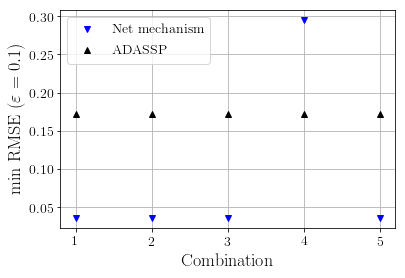

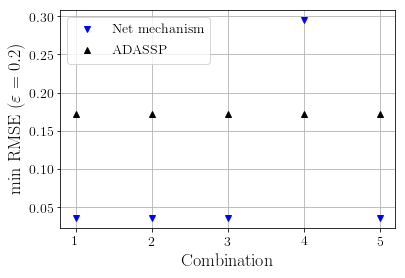

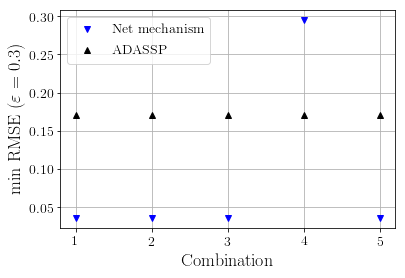

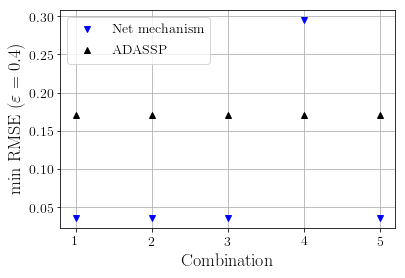

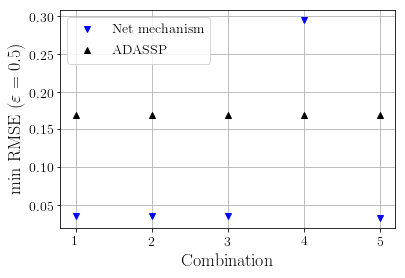

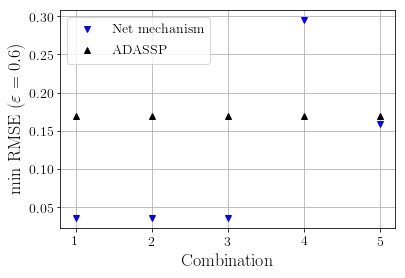

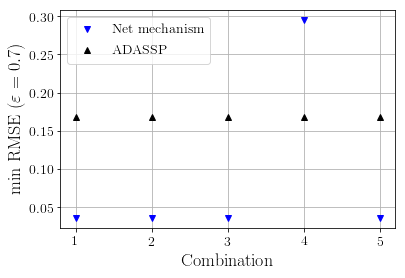

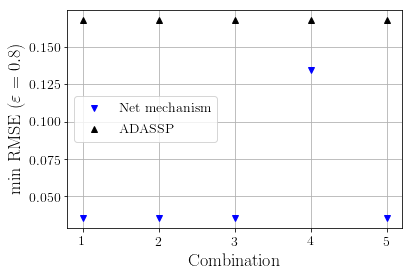

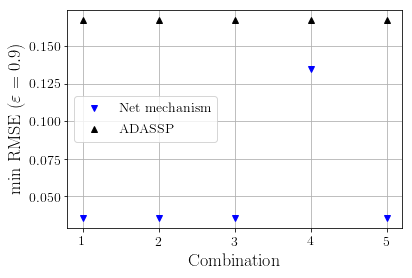

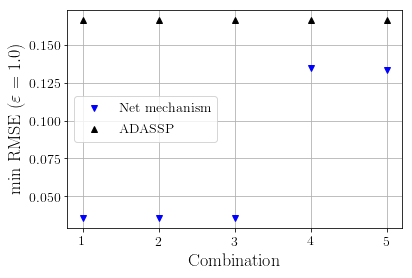

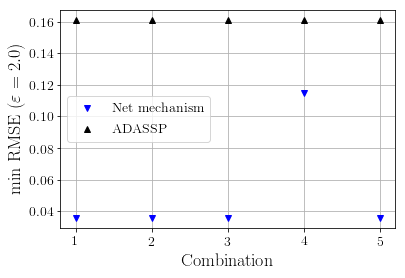

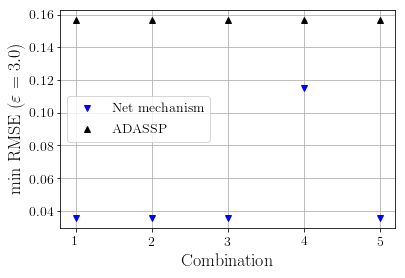

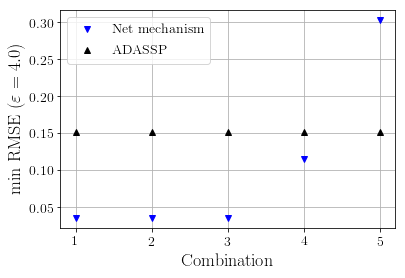

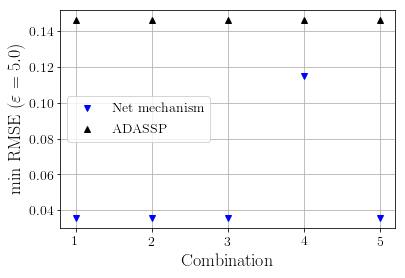

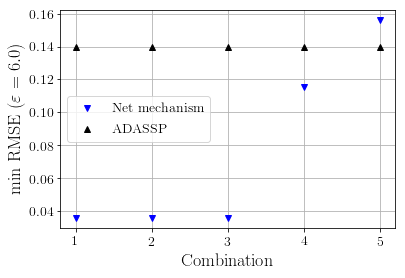

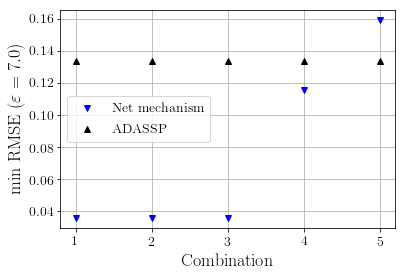

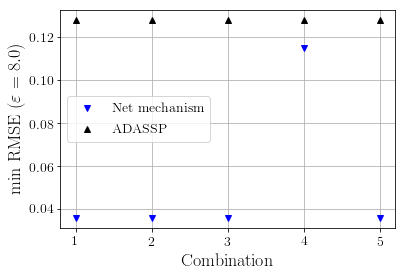

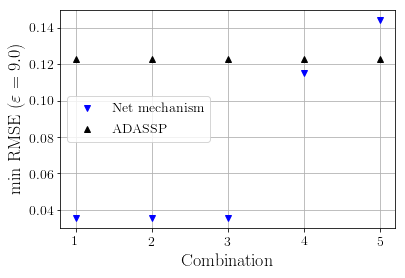

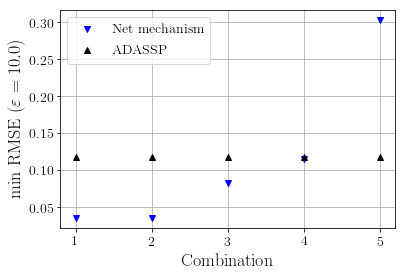

In [52]:
def plot_min_rmses(xcoordinate, min_predictive_errs_netmech, min_predictive_err_adassp, epsilon):
    plt.plot(xcoordinate, min_predictive_errs_netmech, 'bv', label = 'Net mechanism',  )
    plt.plot(xcoordinate, [min_predictive_err_adassp]*len(xcoordinate), 'k^', label = 'ADASSP')
    plt.xlabel('Combination', fontsize = 18)
    plt.ylabel(r'$\min$ RMSE ($\varepsilon =' + str(epsilon) + '$)', fontsize = 18)
    plt.xticks(xcoordinate)
    plt.legend(fontsize = 14)
    plt.grid(True)
    plt.show()
xcoordinate = range(1,num_points_features + 1)
for epsilon in epsilon_vec:
    plot_min_rmses(xcoordinate, min_predictive_errs_netmech[epsilon], min_predictive_err_adassp[epsilon], epsilon)

#### Does better utility imply better "norm values" and better RMSE?

### Save data for cross-experiment comparison

In [ ]:
data = {}

In [ ]:
filename = 'exp_lattice_density_combination'
with open (directory + filename, 'wb') as container:
    pickle.dump(data, container)